In [ ]:
import pandas as pd
data = pd.read_csv('Most Streamed Spotify Songs 2024.csv', sep=',', encoding='ISO-8859-1')

print(data.head())


                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

***IDA***

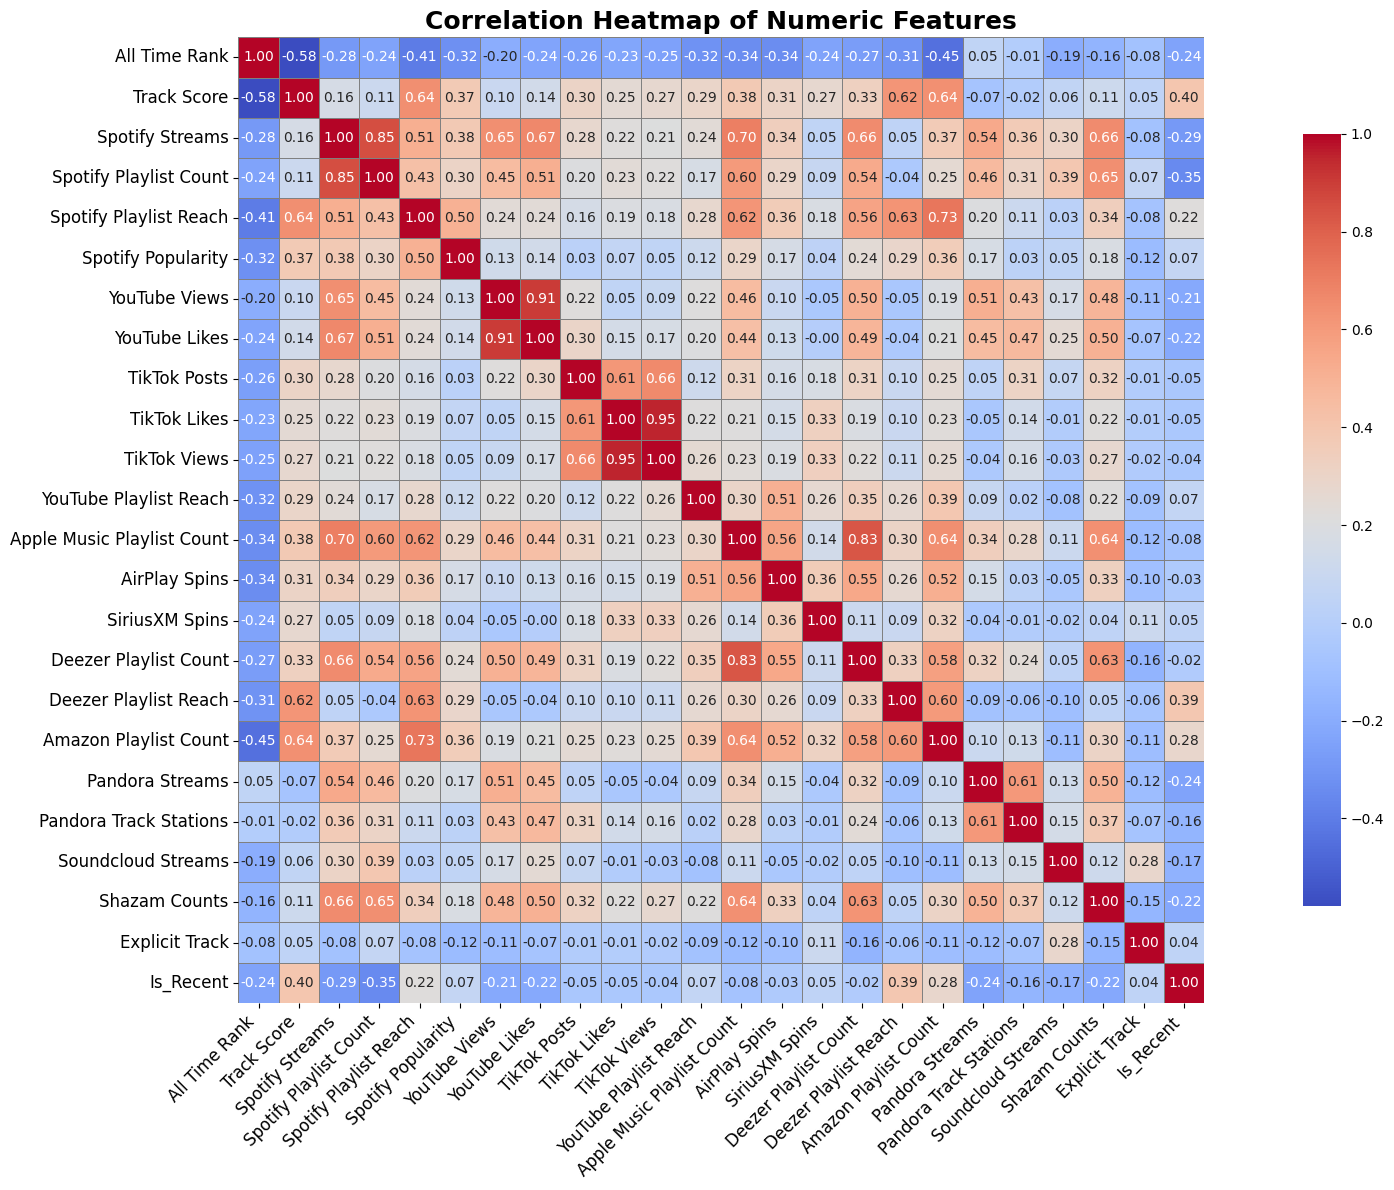

In [2]:
## Deleting feature: 'Tidal Popularity' <-- it is fully empty column
data.drop(columns=['TIDAL Popularity'], axis=1, inplace=True)


## duplicates (if they are)
data.drop_duplicates(inplace=True)

## dropping NaN
data=data.dropna()

## Changing string to int (deleting ,)

# Attempt to convert columns with commas to numeric where possible
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of type object
        data[col] = data[col].str.replace(',', '', regex=True)  # Remove commas
        try:
            data[col] = pd.to_numeric(data[col])  # Convert to numeric if possible
        except ValueError:
            continue  # If conversion fails, leave it as an object



## Convert 'Release Date' to datetime format
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')

latest_date = data['Release Date'].max()
one_year_ago = latest_date - pd.DateOffset(years=1)




## Adding the feature: Is_recent

data['Is_Recent'] = (data['Release Date'] >= one_year_ago).astype(int)
recency_analysis = data.groupby('Is_Recent')['Track Score'].mean()


## correlation diagram
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20,12))
corr_matrix = numeric_data.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": .8},
    square=True,
)

plt.title('Correlation Heatmap of Numeric Features', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()



Division to feature sets for each model

C:\Users\janbe\AppData\Local\Temp\ipykernel_30776\3146443173.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric_data[column], ax=axes[row, col], palette="coolwarm")
C:\Users\janbe\AppData\Local\Temp\ipykernel_30776\3146443173.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric_data[column], ax=axes[row, col], palette="coolwarm")
C:\Users\janbe\AppData\Local\Temp\ipykernel_30776\3146443173.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric_data[column], ax=axes[row, col], palette="coolwarm")
C:\User

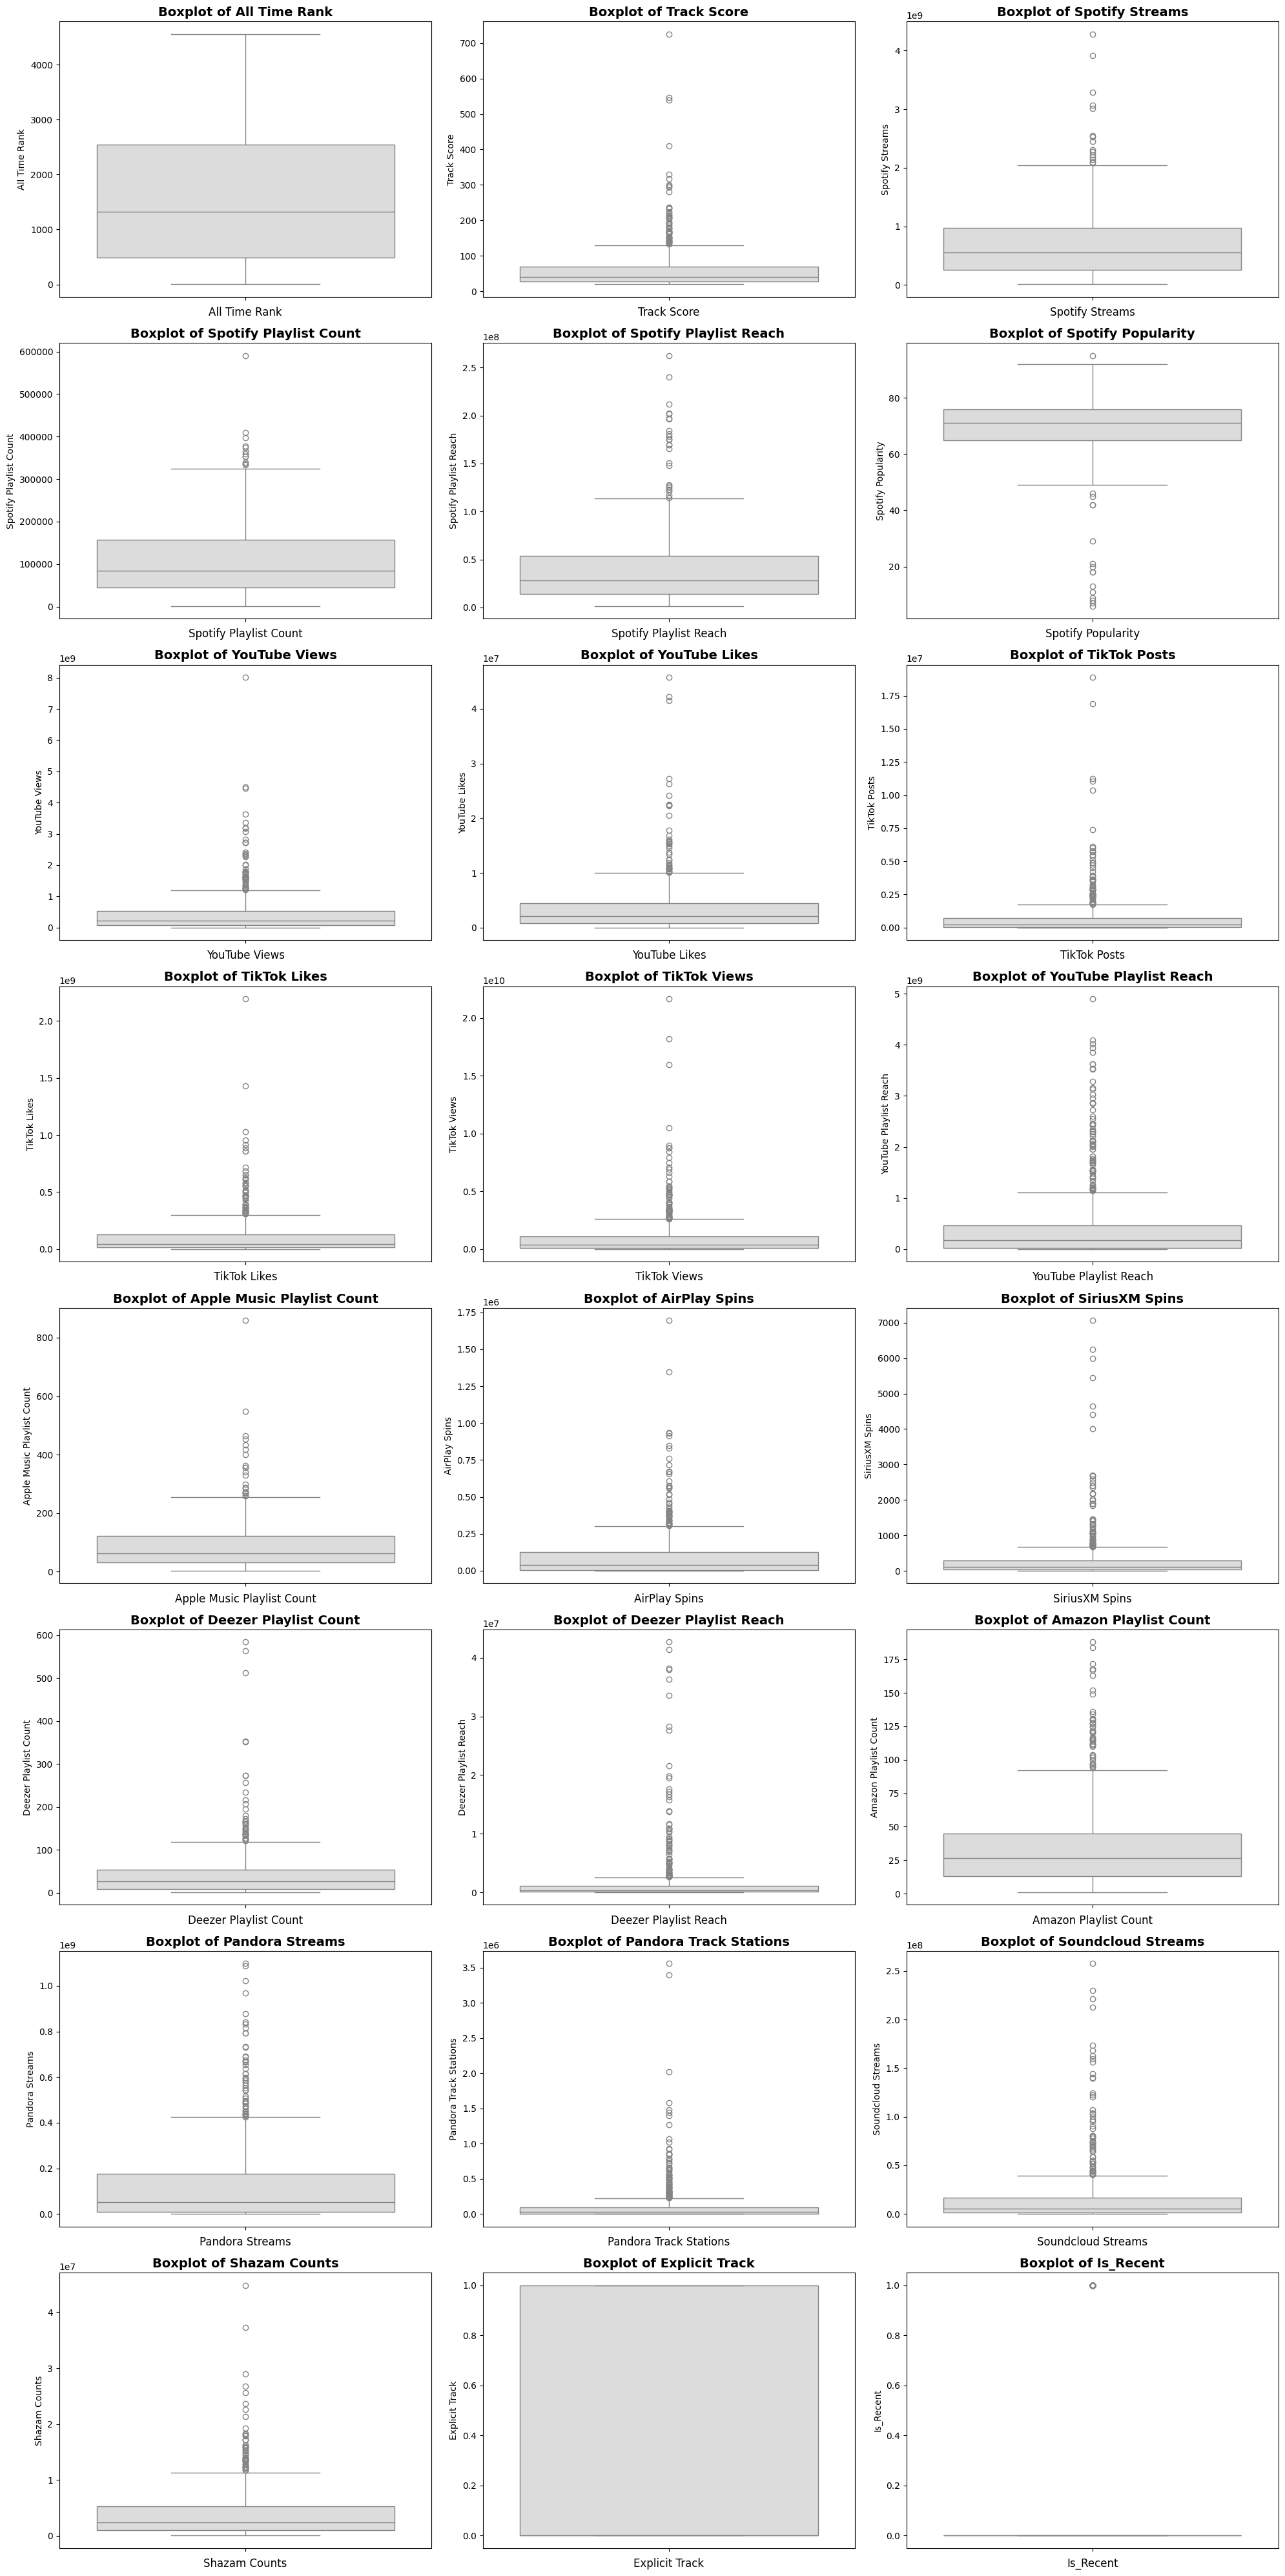

In [3]:
modelSpotify_features=["Spotify Streams","Spotify Playlist Count","Spotify Playlist Reach","Spotify Popularity"]
modelYoutube_features=["YouTube Views","YouTube Likes","YouTube Playlist Reach"]
modelAll_features_col=numeric_data.columns
modelAll_features=modelAll_features_col.tolist()


import math
# Zakładam, że numeric_data to DataFrame z danymi numerycznymi
num_columns = len(numeric_data.columns)
num_rows = math.ceil(num_columns / 3)  # Liczba wierszy w siatce
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, num_rows * 5))

# Iterowanie po kolumnach i tworzenie boxplotów
for i, column in enumerate(numeric_data.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=numeric_data[column], ax=axes[row, col], palette="coolwarm")
    axes[row, col].set_title(f'Boxplot of {column}', fontsize=14, weight='bold')
    axes[row, col].set_xlabel(column, fontsize=12)

# Usunięcie pustych subplots
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes[j // 3, j % 3])

plt.tight_layout()
plt.show()


In [4]:
## data split

from sklearn.model_selection import train_test_split


X = numeric_data.drop('Track Score', axis=1)
y = data['Track Score']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


dataTrain={"data_in":X_train, "data_target":y_train}
dataTest={"data_in":X_test, "data_target":y_test}
dataVal={"data_in":X_val, "data_target":y_val}


Training set size: 338 samples
Validation set size: 113 samples
Test set size: 113 samples


Cutting outliers - ranges or percents

In [5]:
dataTrain_filtered = dataTrain.copy()


#te, które musimy od dolu i gory: 'All Time Rank','Explicit Track','Is_Recent'

## to be continued

'''


ranges = {
    'Spotify Popularity': (0, 40),  # Zakres: min 0, max 100
    'feature2': (10, 50),  # Zakres: min 10, max 50
    'feature3': (-5, 5),   # Zakres: min -5, max 5
}

# Funkcja do odcięcia outlierów zgodnie z podanym zakresem
def trim_outliers(df, ranges):
    trimmed_df = df.copy()
    for column, (min_val, max_val) in ranges.items():
        if column in df.columns:
            # Odcięcie wartości odstających
            trimmed_df[column] = df[column].clip(lower=min_val, upper=max_val)
    return trimmed_df

dataTrain_filtered['data_in'] = trim_outliers(numeric_data, ranges)




for column in dataTrain_filtered['data_in'].columns:
    ## cutting from the bottom
    if column  in ['Spotify Popularity']:
        q_low = dataTrain_filtered['data_in'][column].quantile(0.0001)
        dataTrain_filtered['data_in'] = dataTrain_filtered['data_in'][(dataTrain_filtered['data_in'][column] >= q_low)]
    
    ## cutting from above:
    if column in []:
        q_high = dataTrain_filtered['data_in'][column].quantile(0.99)
        dataTrain_filtered['data_in'] = dataTrain_filtered['data_in'][(dataTrain_filtered['data_in'][column] <= q_high)]
    ## not cutting at all
    else:
        pass
        

print(f"Training set size: {dataTrain_filtered["data_in"].shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

        '''




'\n\n\nranges = {\n    \'Spotify Popularity\': (0, 40),  # Zakres: min 0, max 100\n    \'feature2\': (10, 50),  # Zakres: min 10, max 50\n    \'feature3\': (-5, 5),   # Zakres: min -5, max 5\n}\n\n# Funkcja do odcięcia outlierów zgodnie z podanym zakresem\ndef trim_outliers(df, ranges):\n    trimmed_df = df.copy()\n    for column, (min_val, max_val) in ranges.items():\n        if column in df.columns:\n            # Odcięcie wartości odstających\n            trimmed_df[column] = df[column].clip(lower=min_val, upper=max_val)\n    return trimmed_df\n\ndataTrain_filtered[\'data_in\'] = trim_outliers(numeric_data, ranges)\n\n\n\n\nfor column in dataTrain_filtered[\'data_in\'].columns:\n    ## cutting from the bottom\n    if column  in [\'Spotify Popularity\']:\n        q_low = dataTrain_filtered[\'data_in\'][column].quantile(0.0001)\n        dataTrain_filtered[\'data_in\'] = dataTrain_filtered[\'data_in\'][(dataTrain_filtered[\'data_in\'][column] >= q_low)]\n    \n    ## cutting from above

**MODEL**

In [6]:
## model creating

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

              
model = LinearRegression()    
model.fit(dataTrain["data_in"], dataTrain["data_target"])   


y_train_pred = model.predict(dataTrain["data_in"])   
y_val_pred = model.predict(dataVal["data_in"])

rmse_train = np.sqrt(mean_squared_error(dataTrain["data_target"], y_train_pred))
rmse_val = np.sqrt(mean_squared_error(dataVal["data_target"], y_val_pred))

print("Training RMSE:", rmse_train)
print("Validation RMSE:", rmse_val)



'''
sample_weight = sample_weight = y_train / y_train.max()  

model = LinearRegression()

model.fit(X_train, y_train, sample_weight=sample_weight)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Weighted Training RMSE:", rmse_train)
print("Weighted Validation RMSE:", rmse_val)


'''



Training RMSE: 28.840944825217406
Validation RMSE: 57.76284663585202


'\nsample_weight = sample_weight = y_train / y_train.max()  \n\nmodel = LinearRegression()\n\nmodel.fit(X_train, y_train, sample_weight=sample_weight)\n\ny_train_pred = model.predict(X_train)\ny_val_pred = model.predict(X_val)\n\n\nrmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))\nrmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))\n\nprint("Weighted Training RMSE:", rmse_train)\nprint("Weighted Validation RMSE:", rmse_val)\n\n\n'